# Name  : Guru Aakash G
# Rollno : 191IT220

## Importing Modules

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

## Importing Dataset

In [12]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualization of dataset

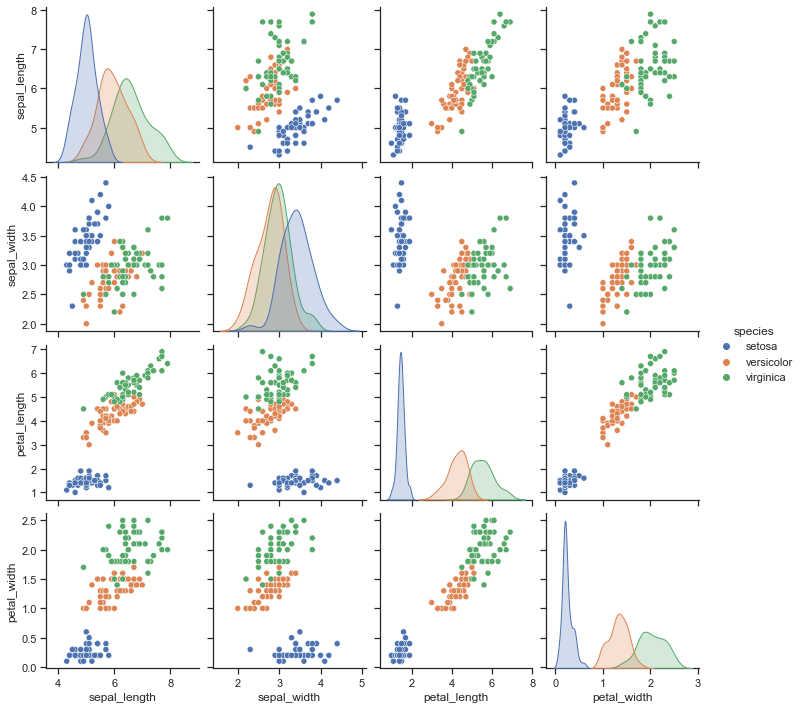

In [14]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
%matplotlib inline

iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")

Here SVD and PCA can be used to reduce the features of the dataset and visalize it in easy way.

Petal length and width shows very high linear correlation, so can be compressed down(reduced to its principle components) 
to a single feature using PCA. Also, Sepal length and width are somewhat correlated so they can be reduced.

So only 2d will be required to display the dataset but before that we need to confirm that only 2 principal components is required to visualize, for this SVD can be used to display the accuracy of the components that can be used.

## SVD Implementation

In [15]:
x = df.drop('species',axis=1)
y = df['species']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
svd = TruncatedSVD()
xtrain = svd.fit_transform(xtrain)
xtest = svd.fit_transform(xtest)

model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print("Accuracy : ",accuracy_score(ytest,ypred))

Accuracy :  0.9473684210526315


In [17]:
components=list(range(1,x.shape[1]))
components

[1, 2, 3]

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)
for i in components:
    model = Pipeline([("SVD",TruncatedSVD(n_components=i)),
                  ("Logistic Regression",LogisticRegression())])
    model_fit=model.fit(xtrain,ytrain)
    ypred=model_fit.predict(xtest)
    print("Accuracy for {} component is {} ".format(i,accuracy_score(ytest,ypred)))

Accuracy for 1 component is 0.7894736842105263 
Accuracy for 2 component is 0.9736842105263158 
Accuracy for 3 component is 0.9736842105263158 


Clearly, the accuracy with SVD of 2 components is more than 97%.

## PCA Implementation

In [19]:
x = StandardScaler().fit_transform(x)

In [20]:
pca = PCA(n_components=1)
dfx_pca = pca.fit(x)
dfx_trans = pca.transform(x)
dfx_trans = pd.DataFrame(data=dfx_trans)

print(pca.explained_variance_ratio_)
dfx_trans.head()

[0.72770452]


,0
0,-2.264542
1,-2.086426
2,-2.367950
3,-2.304197
4,-2.388777


In [21]:
pca = PCA(n_components=2)
dfx_pca = pca.fit(x)
dfx_trans = pca.transform(x)
dfx_trans = pd.DataFrame(data=dfx_trans)

print(pca.explained_variance_ratio_)
dfx_trans.head()

[0.72770452 0.23030523]


,0,1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [22]:
pca = PCA(n_components=3)
dfx_pca = pca.fit(x)
dfx_trans = pca.transform(x)
dfx_trans = pd.DataFrame(data=dfx_trans)

print(pca.explained_variance_ratio_)
dfx_trans.head()

[0.72770452 0.23030523 0.03683832]


,0,1,2
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


## Visualization of dataset after applying PCA,SVD

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


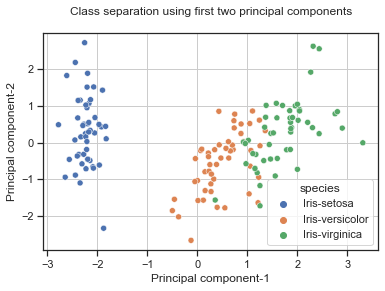

In [23]:
sns.scatterplot(dfx_trans[0],dfx_trans[1],hue=df['species'])
plt.grid(True)
plt.title("Class separation using first two principal components\n")
plt.xlabel("Principal component-1")
plt.ylabel("Principal component-2")
plt.show()

## Conclusions

Generally here PCA and SVD are used for dimensionality reduction. Before applying PCA and SVD, the dataset is displayed as a 4x4 matrix which is difficult to understand each cell individually. So PCA and SVD is applied to the dataset, so that the features had been reduced and also visulization is easy.

Also for big datasets like 10000 rows and 10000 columns, PCA and SVD can be applied to reduce its dimensions and visualize it in less time as compared to normal visualiztion.